In [4]:
from pymongo import MongoClient
import datetime
from bson.objectid import ObjectId
import matplotlib.pyplot as plt

db = MongoClient().pam_1915


{'_id': 0, 'elapssed': 1.834566387053459, 'count': 155}
{'_id': 1, 'elapssed': 2.137397821132953, 'count': 13}
{'_id': 2, 'elapssed': 1.4127293138314556, 'count': 151}
{'_id': 3, 'elapssed': 3.168332318464915, 'count': 12}


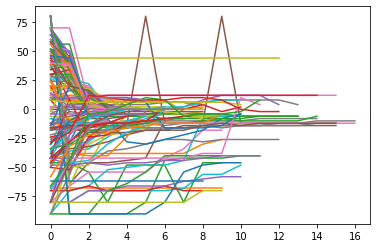

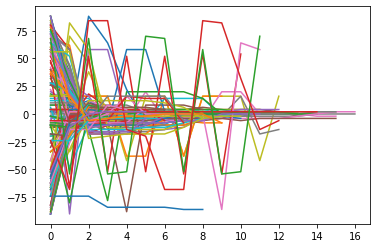

In [5]:
mins = 3.5 * 60 + 200
gen_time = datetime.datetime.today() - datetime.timedelta(minutes=mins) 
dummy_id = ObjectId.from_datetime(gen_time)


res = list(db.aligner_stats.aggregate([
    {
        '$match': {
            '_id': {'$gte': dummy_id},
            'final': {'$in':['aligned', 'timeout']},
        }
    },
    {
        '$group': {
            '_id': '$camera_index',
            'elapssed': { '$avg': '$duration' },
            'count': { '$sum': 1 }
        }
    },
    {
        '$sort' : { '_id': 1 }
    },

]))
[print(r) for r in res]

matchs = list(db.aligner_stats.find({
    '_id': {'$gte': dummy_id},
    'final': {'$in':['aligned', 'timeout']},
    'camera_index': 0
}))

dosing_steps = [match['dosing_steps'] for match in matchs]
holder_steps = [match['holder_steps'] for match in matchs]


plt.figure(0)
[plt.plot(z) for z in dosing_steps]
plt.show()


plt.figure(1)
[plt.plot(z) for z in holder_steps]
plt.show()


In [2]:
import pickle
import numpy as np
clf = pickle.load(open('vision/models/dosing.v8.1.1.clf', 'rb'))

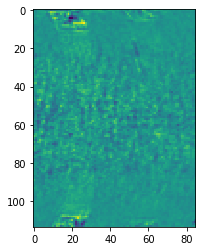

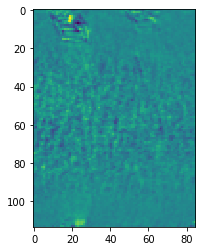

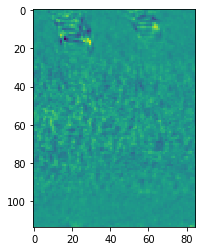

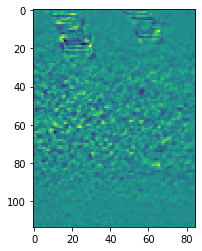

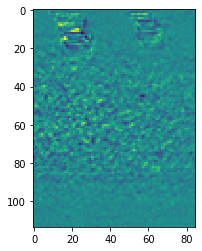

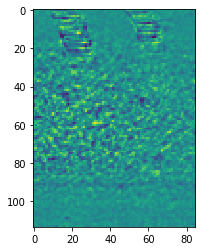

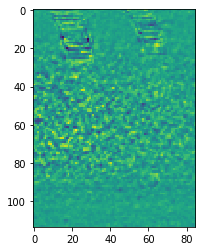

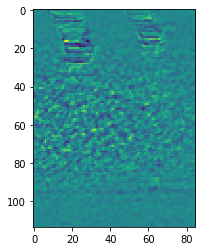

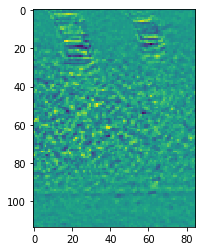

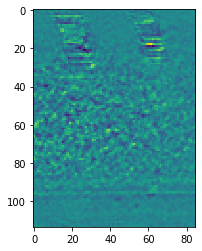

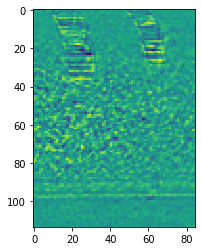

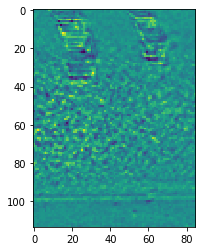

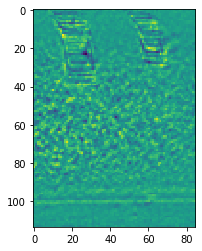

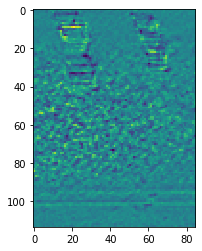

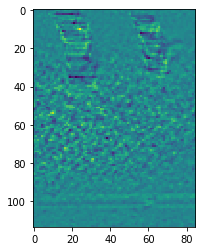

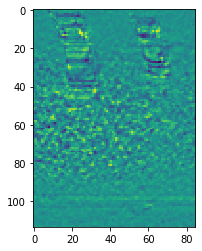

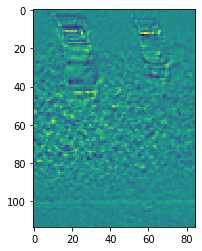

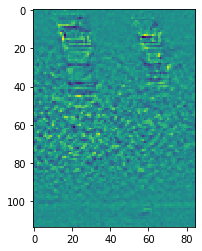

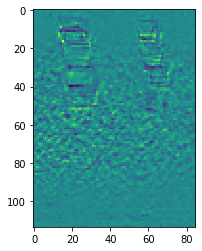

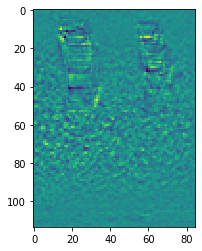

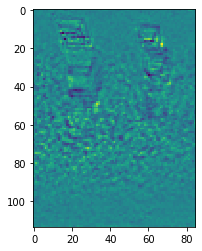

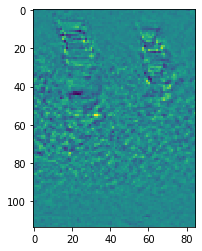

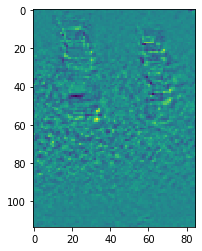

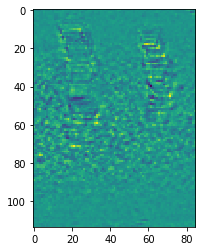

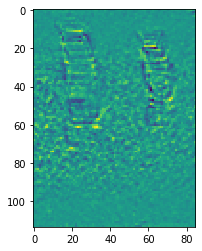

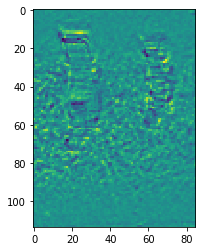

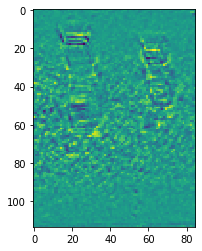

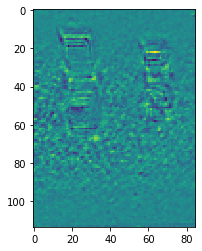

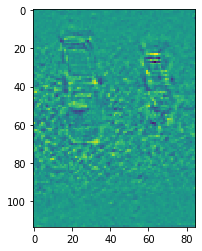

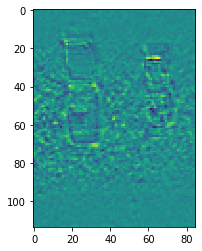

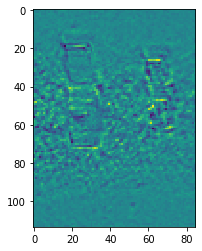

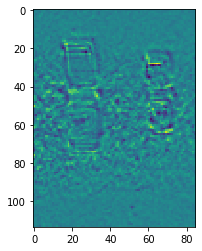

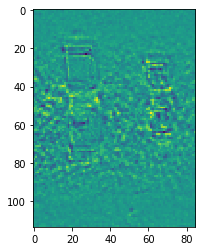

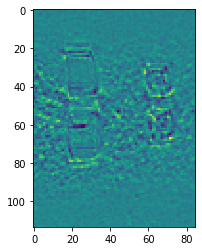

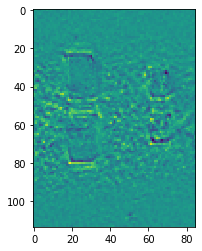

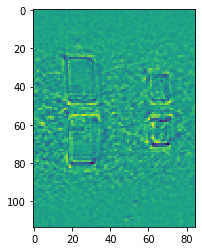

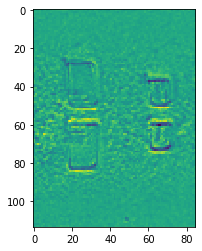

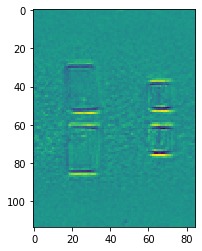

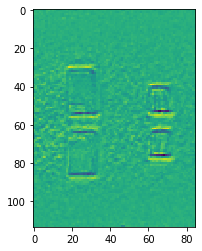

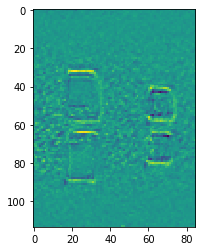

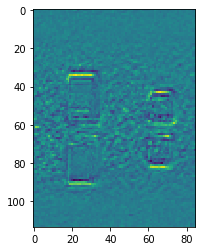

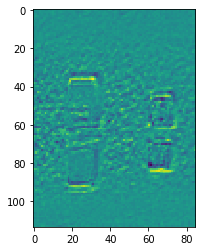

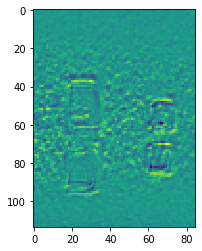

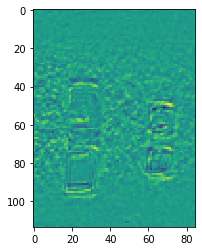

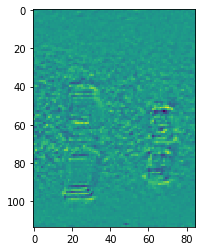

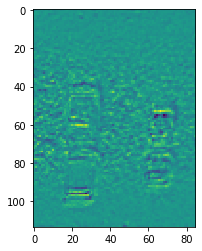

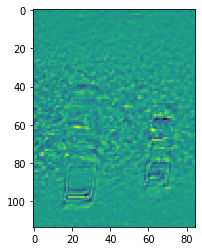

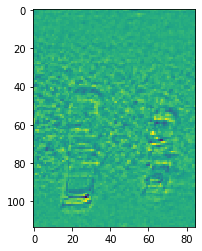

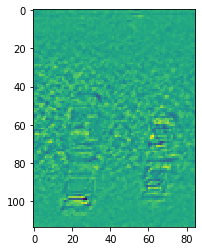

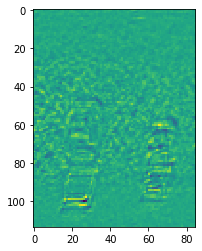

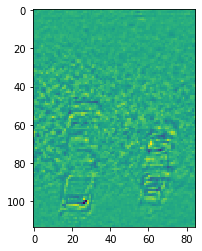

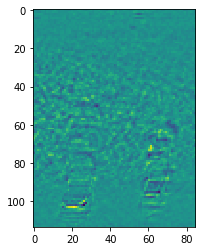

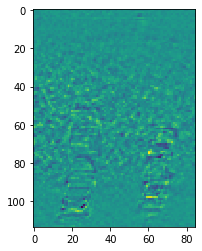

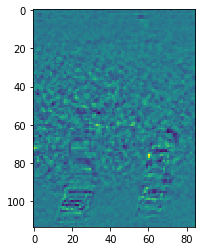

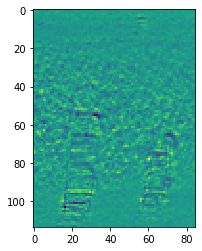

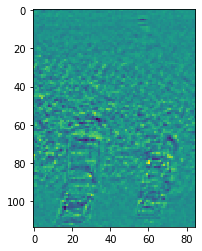

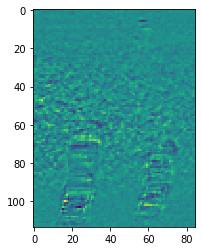

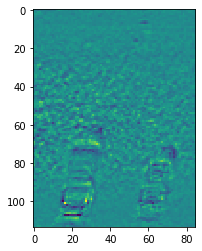

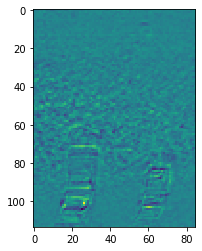

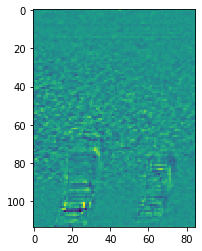

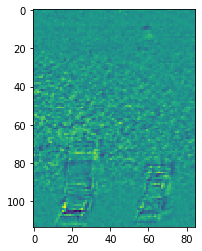

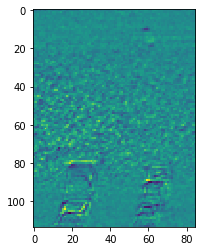

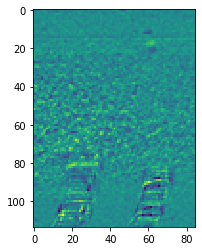

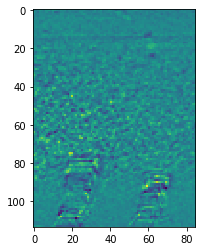

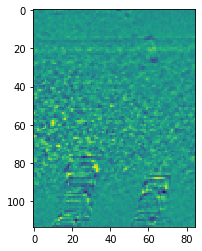

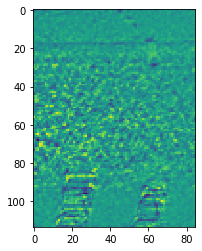

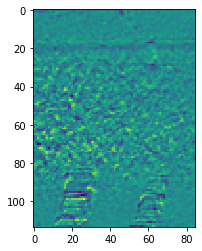

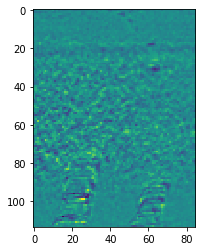

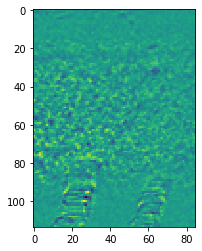

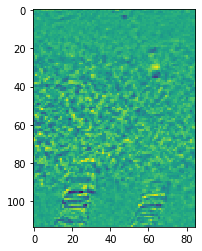

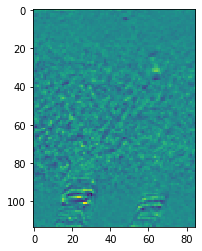

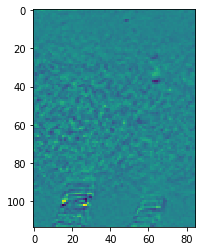

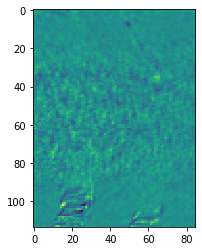

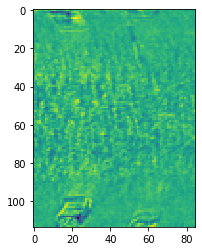

In [5]:
# https://stackoverflow.com/a/59203757
# a = clf.calibrated_classifiers_[5].base_estimator.coef_[41].reshape(114, -1)
coefs = np.array([j.base_estimator.coef_ for j in clf.calibrated_classifiers_]).mean(axis=0)
coefs = coefs.reshape(coefs.shape[0], 114, -1)

for i in range(coefs.shape[0]):
    plt.figure(i)
    plt.imshow(coefs[i])
    plt.show()
